<a href="https://colab.research.google.com/github/swhacademy/tensorflow-guide/blob/master/0_3_%EC%8B%A4%EC%8A%B5_%EC%98%A4%EB%8A%98_%EB%82%A0%EC%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
res = requests.get("https://weather.naver.com/rgn/cityWetrMain.nhn")
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n\t<meta property="og:title" content="네이버 날씨"/>\r\n\t<meta property="og:url" content="http://weather.naver.com/rgn/cityWetrMain.nhn"/>\r\n\t<meta property="og:image" content="https://ssl.pstatic.net/static/weather/m/og_weather.png"/>\r\n\t<meta property="og:description" content="생활에 꼭 필요한 날씨와 대기환경정보"/>\r\n\t<link rel="shortcut icon" href="https://ssl.pstatic.net/static/www/nFavicon64.ico" type="image/x-icon">\r\n\t<title>네이버 날씨</title>\r\n\t<link rel="stylesheet" type="text/css" href="/common/css/weather_common.css?20150911">\r\n\t<link rel="stylesheet" type="text/css" href="/common/css/weather_renew.css?20150911">\r\n\t<!-- AU 추가 CSS -->\r\n\t<style type="text/css">\r\n\t\t.tab_bx.nhn_ui_panel { display: none; }\r\n\t\t.tab_bx.nhn_ui_selected { display: block; }\r\n\t</style>\r\n\t<!-- AU 추가 CSS -->\r\n\t<!-- AU foggy css -->\r\n\t<style type="text/css">\r\n\t\tdiv

In [3]:
soup = BeautifulSoup(res.text,'html')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="네이버 날씨" property="og:title"/>
<meta content="http://weather.naver.com/rgn/cityWetrMain.nhn" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/weather/m/og_weather.png" property="og:image"/>
<meta content="생활에 꼭 필요한 날씨와 대기환경정보" property="og:description"/>
<link href="https://ssl.pstatic.net/static/www/nFavicon64.ico" rel="shortcut icon" type="image/x-icon"/>
<title>네이버 날씨</title>
<link href="/common/css/weather_common.css?20150911" rel="stylesheet" type="text/css"/>
<link href="/common/css/weather_renew.css?20150911" rel="stylesheet" type="text/css"/>
<!-- AU 추가 CSS -->
<style type="text/css">
		.tab_bx.nhn_ui_panel { display: none; }
		.tab_bx.nhn_ui_selected { display: block; }
	</style>
<!-- AU 추가 CSS -->
<!-- AU foggy css -->
<style type="text/css">
		div.z_select .layer_popup,
		.remove_item {
			display:none;
		}

		div.dim_new {
			position:a

In [0]:
div = ['오전기온', '오전강수확률', '오후기온', '오후강수확률']
loc = ['서울경기', '서해5도', '강원영서', '강원영동', '충청북도', '충청남도', '경상북도', '경상남도', '울릉독도', '전라북도', '전라남도', '제주']

In [5]:
content = soup.find('div', {'id' : 'content'})
content_td = content.select("td")
content_td

[<td>
 <p class="icon"><img alt="흐리고 비" height="46" src="https://ssl.pstatic.net/static/weather/images/w_icon/w_l4.gif" width="64"/></p>
 <ul class="text">
 <li class="nm">흐리고 비</li>
 <li>기온 <span class="temp"><strong>8.0</strong>℃</span><br/>
 							강수확률 <span class="rain"><strong>60</strong>%</span></li>
 </ul>
 </td>, <td class="line">
 <p class="icon"><img alt="구름조금" height="46" src="https://ssl.pstatic.net/static/weather/images/w_icon/w_l2.gif" width="64"/></p>
 <ul class="text">
 <li class="nm">구름조금</li>
 <li>기온 <span class="temp"><strong>13.0</strong>℃</span><br/>
 							강수확률 <span class="rain"><strong>10</strong>%</span></li>
 </ul>
 </td>, <td>
 <p class="icon"><img alt="구름조금" height="46" src="https://ssl.pstatic.net/static/weather/images/w_icon/w_l2.gif" width="64"/></p>
 <ul class="text">
 <li class="nm">구름조금</li>
 <li>기온 <span class="temp"><strong>6.0</strong>℃</span><br/>
 							강수확률 <span class="rain"><strong>10</strong>%</span></li>
 </ul>
 </td>, <td class="line">
 <

In [6]:
data = []
tmp = []
for b in range(len(content_td)):
  t = content_td[b].text.replace('\r', '').replace('\t', '').strip() # '흐림\n기온 15.0℃\n강수확률 30%', '흐리고 비\n기온 17.0℃\n강수확률 80%'
  temperature = t.split('\n')[1].split()[1].replace('℃', '')
  rain = t.split('\n')[2].split()[1].replace('%', '')
  tmp.append(temperature)
  tmp.append(rain)
  if b % 2 == 1:
    data.append(tmp)
    tmp = []
  
data

[['8.0', '60', '13.0', '10'],
 ['6.0', '10', '12.0', '10'],
 ['7.0', '80', '12.0', '20'],
 ['7.0', '80', '9.0', '80'],
 ['10.0', '60', '14.0', '60'],
 ['10.0', '60', '14.0', '60'],
 ['11.0', '80', '13.0', '60'],
 ['13.0', '60', '16.0', '60'],
 ['6.0', '70', '9.0', '20'],
 ['10.0', '30', '14.0', '60'],
 ['10.0', '30', '13.0', '60'],
 ['12.0', '20', '15.0', '20']]

In [7]:
df = pd.DataFrame(data, index=loc, columns=div)
df

,오전기온,오전강수확률,오후기온,오후강수확률
서울경기,8.0,60,13.0,10
서해5도,6.0,10,12.0,10
강원영서,7.0,80,12.0,20
강원영동,7.0,80,9.0,80
충청북도,10.0,60,14.0,60
충청남도,10.0,60,14.0,60
경상북도,11.0,80,13.0,60
경상남도,13.0,60,16.0,60
울릉독도,6.0,70,9.0,20
전라북도,10.0,30,14.0,60


In [8]:
df['오전기온'].values

array(['8.0', '6.0', '7.0', '7.0', '10.0', '10.0', '11.0', '13.0', '6.0',
       '10.0', '10.0', '12.0'], dtype=object)

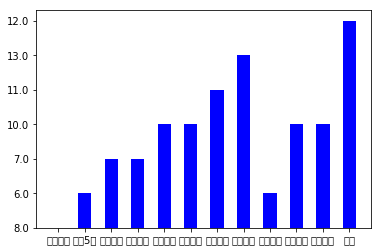

In [9]:
import matplotlib.pyplot as plt
# 출력방식 결정. 'inline'은 현 노트에 그림 출력. 생략 가능
%matplotlib inline

y = df['오전기온'].values
x = loc

plt.bar(x, y, width=0.5, color="blue")
plt.show()